## Example of Working with Sentinel-2 Data with Sentinelhub, EO-Learn, and a Example Zone of Data

This notebook will include steps to 
1) Configure a connection with sentnelhub 
1) Load in geojson of the example zone. 
2) Define the CRS and the BBox for the demo Zone 
3) Define EOTasks to be Preformed 
0) Define a EOWorkflow for the EO Tasks 
0) Excicute the Workflow 
0) Vizulaize the results 




In [1]:
# Packages Ren Finds She Needs to Install
!pip install gdal
!pip install rasterio
!pip install shapely
!pip install fiona
!pip install eo-learn
!pip install numpy==1.15.4 
!pip install scikit-image==0.14.0

You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 19.6MB 54kB/s  eta 0:00:01   17% |█████▊                          | 3.5MB 28.9MB/s eta 0:00:01    39% |████████████▋                   | 7.7MB 9.9MB/s eta 0:00:02    73% |███████████████████████▍        | 14.4MB 5.8MB/s eta 0:00:01
You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 1.5MB 13.0MB/s ta 0:00:01
You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 17.9MB 2.4MB/s eta 0:00:01
  Stored in directory: /home/nbuser/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch
You are usin

    6% |██                              | 1.6MB 34.8MB/s eta 0:00:01

    100% |████████████████████████████████| 26.1MB 1.5MB/s eta 0:00:01
    100% |████████████████████████████████| 22.4MB 39kB/s  eta 0:00:01    69% |██████████████████████          | 15.5MB 27.3MB/s eta 0:00:01
    100% |████████████████████████████████| 10.8MB 522kB/s ta 0:00:011
    100% |████████████████████████████████| 133kB 20.0MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 8.7MB/s eta 0:00:01
    100% |████████████████████████████████| 1.2MB 10.0MB/s ta 0:00:01    32% |██████████▌                     | 389kB 13.0MB/s eta 0:00:01


  Stored in directory: /home/nbuser/.cache/pip/wheels/91/4d/a4/7edb197fc9275482c0920a96eada1118751468cbb0ea31d250
  Stored in directory: /home/nbuser/.cache/pip/wheels/73/83/af/e1beb4a24d7f34ef8a9d41277e0a5d0f8c9f0a1c836404844c
  Stored in directory: /home/nbuser/.cache/pip/wheels/7f/2d/21/2fd3128af080f0459f7d1a51ac00627f0baf824039cb8bad18
  Stored in directory: /home/nbuser/.cache/pip/wheels/55/fe/ac/e7e3cf444be38847d903299142b576b5db36bad6e6e2de10e0
  Stored in directory: /home/nbuser/.cache/pip/wheels/ed/af/de/9026ee1fc0177618b69c165e25a2bdfd91c10a13bd6e808622
  Stored in directory: /home/nbuser/.cache/pip/wheels/a3/16/18/a24e33af30c1525dfda14b5a50df33a0ea8b7ba07607261405
  Stored in directory: /home/nbuser/.cache/pip/wheels/69/7c/00/72817b0043c000b1d4ca9d77ae6d61e76d206a5fb70c33f3c1
  Stored in directory: /home/nbuser/.cache/pip/wheels/9d/a7/ef/df072bb40d3f1f8f3ca985f84efdc9869d7b3aff95987e494b
  Stored in directory: /home/nbuser/.cache/pip/wheels/de/6e/dd/c5172037a8d52b20e8ad5cce5

In [3]:
#Tools 
import numpy as np
import datetime

# Load in Eco-learn
from eolearn.core import EOPatch
from eolearn.core.eoworkflow import LinearWorkflow, Dependency
from eolearn.core.eodata import FeatureType
from eolearn.core import SaveToDisk, LoadFromDisk
from eolearn.io import S2L1CWCSInput, AddSen2CorClassificationFeature, DEMWCSInput, S2L2AWCSInput, L8L1CWCSInput

# Basics of GIS
import geopandas as gpd

# matplotlib 
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Sentinel Hub
# BBox is Bounding Box and CRS is Cordinate Reference System
from sentinelhub import BBox, CRS

# Shapley for dealing with geometries 
from shapely.geometry import Polygon



# Setting up the Connection with Sentinelhub

In order to run the example you'll need a Sentinel Hub account. If you do not have one yet, you can create a free trial account at [Sentinel Hub webpage](https://services.sentinel-hub.com/oauth/subscription). If you are a researcher you can even apply for a free non-commercial account at [ESA OSEO page](https://earth.esa.int/aos/OSEO).

Once you have the account set up, login to [Sentinel Hub Configurator](https://apps.sentinel-hub.com/configurator/). By default you will already have the default configuration with an **instance ID** (alpha-numeric code of length 36). For this tutorial we recommend that you create a new configuration (`"Add new configuration"`) and set the configuration to be based on **Python scripts template**. Such configuration will already contain all layers used in these examples. Otherwise you will have to define the layers for your configuration yourself.

After you have prepared a configuration please put configuration's **instance ID** into `sentinelhub` package's configuration file following the [configuration instructions](http://sentinelhub-py.readthedocs.io/en/latest/configure.html).

In [4]:
# Set up the connection with sentinel hub

INSTANCE_ID = '81471ea5-dd2c-42fc-b79f-775cc5f90cd3'

#!sentinelhub.config --instance_id 81471ea5-dd2c-42fc-b79f-775cc5f90cd3
!sentinelhub.config --show

{
  "instance_id": "",
  "aws_access_key_id": "",
  "aws_secret_access_key": "",
  "ogc_base_url": "https://services.sentinel-hub.com/ogc/",
  "geopedia_wms_url": "http://service.geopedia.world/",
  "geopedia_rest_url": "https://www.geopedia.world/rest/",
  "aws_metadata_url": "https://roda.sentinel-hub.com/",
  "aws_s3_l1c_bucket": "sentinel-s2-l1c",
  "aws_s3_l2a_bucket": "sentinel-s2-l2a",
  "opensearch_url": "http://opensearch.sentinel-hub.com/resto/api/collections/Sentinel2/",
  "max_wfs_records_per_query": 100,
  "max_opensearch_records_per_query": 500,
  "default_start_date": "1985-01-01",
  "max_download_attempts": 4,
  "download_sleep_time": 5,
  "download_timeout_seconds": 120
}
Configuration file location: /home/nbuser/anaconda3_420/lib/python3.5/site-packages/sentinelhub/config.json


# The Demo Zone 

For example purposes, we have taken the Beach-Flat_16 area and gave it a pretty big bounding box. The bounding box was inflated to compensate for low resolution.
Texas_AOI_Demo_Select_Data_Example_ID2.geojson

In [5]:
# Load GeoJson File via geopandas
demozone = gpd.read_file('./demo_data/Texas_AOI_Demo_Select_Data_Med_ID2.geojson')
print(type(demozone))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [6]:
## Review the demozone object. 
# demozone is a geopandas object. And it will look and act like a panda's dataframe. 
# Note the geometry feild. This field contains the polygon object, every geopandas dataframe needs a geometry component
# The geometry object is a shaply object.
demozone

,BLUE,Classname,Classvalue,Count_,FID,GREEN,RED,geometry
0,216,Beach-Flat_16,19,2,1,95,2,POLYGON ((-95.39088606834412 28.89766330138642...


In [7]:
# Define the Projection 

# Note CRS.WGS84 is "EPSG:4326" Which is what sentinel hub seems to prefer 
demozone_crs = CRS.WGS84
demozone = demozone.to_crs(crs={'init': CRS.ogc_string(demozone_crs)})

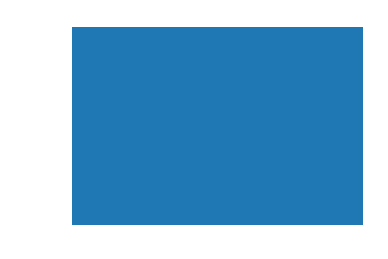

In [8]:
# Just an example on Plot DemoZone
demozone.plot()
plt.axis('off');

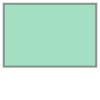

In [9]:
# Use the Geometry to define a bounding box

# Get the country's shape in polygon format
demozone_shape = demozone.geometry.values.tolist()[-1]
demozone_shape

In [10]:
demozone_bounds = list(demozone_shape.bounds)
demozone_bounds

[-95.39088606834412,
 28.897663301386416,
 -95.38743138313292,
 28.900011506534884]

In [11]:
# Print size using the polygon shape
print('Dimension of the area is {0:.0f} x {1:.0f} m2'.format(demozone_shape.bounds[2] - demozone_shape.bounds[0],
                                                             demozone_shape.bounds[3] - demozone_shape.bounds[1]))

Dimension of the area is 0 x 0 m2


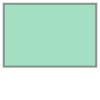

In [12]:
# Define the bounding Box 
demozone_bbox = BBox(bbox=demozone_bounds, crs=CRS.WGS84)
demozone_bbox

# Define Time Interval
## The time interval for which we will request data 
Note: that in the Original Report the Collect Data data from July 2017 - October 2017 for the pre-Harvey data
The Harvey Storm data was defined as August 17-September 2, 2017

In [13]:
time_interval = ('2017-09-01', '2017-10-01')

## Define EoTasks that Will be Used When Requesting Data 

If you would like to see a basic workflow of EOlear check out:
https://eo-learn.readthedocs.io/en/latest/examples/core/CoreOverview.html

EO examples are here (include a full basic workflow):
https://eo-learn.readthedocs.io/en/latest/examples/io/SentinelHubIO.html

If you would like to see more developed examples, look at the eo-learn github examples folder :
https://github.com/sentinel-hub/eo-learn/tree/master/examples

In [14]:
#In this workflow example, the input task requests S2 L1C bands at 10m resolution, 
# and other eotasks add NDVI features, digital elevation model DEM, S2 L2A bands.

# This feild is defining the sentinel imaging product we are requesting in this example. 
# For details see here: https://earth.esa.int/web/sentinel/user-guides/sentinel-2-msi/product-types/level-1c
layer = 'BANDS-S2-L1C'

# Task for creating EOPatches and filling them with Sentinel-2 L1C data using Sentinel Hub’s WCS request.
# Note the resulution is 10m 
# Note: maxcc = max cloud cover 
input_task = S2L1CWCSInput(layer=layer,
                           resx='10m', resy='10m',
                           maxcc=.8, time_difference=datetime.timedelta(hours=2))


add_ndvi = S2L1CWCSInput(layer='NDVI')

#Adds DEM to DATA_TIMELESS EOPatch feature.
#https://eo-learn.readthedocs.io/en/latest/eolearn.io.sentinelhub_service.html#eolearn.io.sentinelhub_service.SentinelHubOGCInput
add_dem = DEMWCSInput(layer='DEM')

save = SaveToDisk('io_example', overwrite_permission=2, compress_level=1)

In [16]:
## Define the Workflow 
# Add in tasks to LinearWorkflow to create a workflow
workflow = LinearWorkflow(input_task, add_ndvi, add_dem, save)

In [17]:
## Exicute the worldflow
result = workflow.execute({input_task: {'bbox': demozone_bbox, 'time_interval': time_interval},
                           save: {'eopatch_folder': 'eopatch'}})

ValueError: During execution of task S2L1CWCSInput: Instance ID is not set. Set it either in request initialization or in configuration file. Check http://sentinelhub-py.readthedocs.io/en/latest/configure.html for more info.

In [78]:
eopatch = result[save]
eopatch

EOPatch(
  data: {
    BANDS-S2-L1C: numpy.ndarray(shape=(6, 26, 34, 13), dtype=float32)
    NDVI: numpy.ndarray(shape=(6, 26, 34, 1), dtype=float32)
  }
  mask: {
    IS_DATA: numpy.ndarray(shape=(6, 26, 34, 1), dtype=bool)
  }
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {
    DEM: numpy.ndarray(shape=(26, 34, 1), dtype=float32)
  }
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {
    maxcc: 0.8
    service_type: 'wcs'
    size_x: '10m'
    size_y: '10m'
    time_difference: datetime.timedelta(0, 7200)
    time_interval: ('2017-09-01', '2017-10-01')
  }
  bbox: BBox(((-95.39088606834412, 28.897663301386416), (-95.38743138313292, 28.900011506534884)), crs=EPSG:4326)
  timestamp: [datetime.datetime(2017, 9, 4, 17, 15, 17), ..., datetime.datetime(2017, 10, 1, 16, 59, 57)], length=6
)

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(eopatch.data['BANDS-S2-L1C'][3][..., [3,2,1]] * 2.5, vmin=0, vmax=1);

NameError: name 'eopatch' is not defined

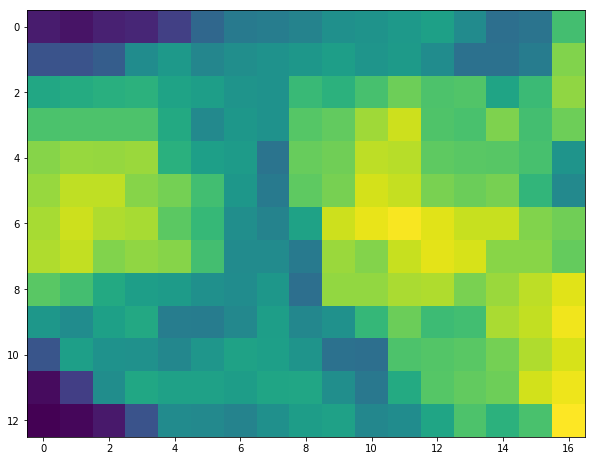

In [61]:
plt.figure(figsize=(10,10))
plt.imshow(eopatch.data['NDVI'][3].squeeze());

In [38]:
plt.figure(figsize=(10,10))
plt.imshow(eopatch.data['BANDS-S2-L2A'][3][...,[3,2,1]] * 2.5, vmin=0, vmax=1);


KeyError: 'BANDS-S2-L2A'